In [1]:
import pandas as pd
import glob
import openpyxl

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readCsvDf(dir, fileName=None):
    try: 
        if dir.endswith('.csv'):
            filesValidation = glob.glob(dir, recursive=False)
            df = pd.read_csv(filesValidation[0])

            return {
                'ok': True,
                'data': df, 
                'msg': f'The DataFrame extraction was successful'
            }

        elif fileName is None:
            filesValidation = glob.glob(f'{dir}/*', recursive=False)
            df = pd.read_csv(filesValidation[0])

            return {
                'ok': True,
                'data': df, 
                'msg': f'The file name was not provided, so the chosen dataset is {filesValidation[0]}'
            }

        fileValidation = glob.glob(f'{dir}/{fileName}', recursive=False)
        df = pd.read_csv(fileValidation[0])
        return {
            'ok': True,
            'data': df, 
            'msg': 'The DataFrame extraction was successful'
        }
    
    except Exception as e:
        return {
            'ok': False, 
            'data': None,
            'msg': f'There is no CSV file named {fileName}'
        }

In [3]:
readCsvRes = readCsvDf('data', 'retail_data.csv')

df = readCsvRes['data'].copy()

df = df.drop_duplicates()

df.columns = ['transaction_id', 'purchase_date', 'product_category', 'amount', 'customer_id']

dfDescription = df.describe(include = 'all')

dfDescription.to_excel('data/tables/describeDf.xlsx', sheet_name='si', engine= 'openpyxl')

dfInfo = df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 819
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    802 non-null    int64 
 1   purchase_date     778 non-null    object
 2   product_category  778 non-null    object
 3   amount            778 non-null    object
 4   customer_id       802 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 37.6+ KB


In [4]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format = "%Y-%m-%d")

'''df['group_id'] = (
    df.groupby(['customer_id', 'purchase_date']).ngroup()
)

mask = df.duplicated(subset=['purchase_date', 'customer_id'], keep=False)

df['group_id'] = np.where(mask, 
    df.groupby(['customer_id', 'purchase_date']).ngroup(), 
    np.nan)

df.loc[df['group_id'].notna(), 'transaction_id'] = df.loc[df['group_id'].notna(), 'group_id']

df = df.drop('group_id', axis=1)'''

"df['group_id'] = (\n    df.groupby(['customer_id', 'purchase_date']).ngroup()\n)\n\nmask = df.duplicated(subset=['purchase_date', 'customer_id'], keep=False)\n\ndf['group_id'] = np.where(mask, \n    df.groupby(['customer_id', 'purchase_date']).ngroup(), \n    np.nan)\n\ndf.loc[df['group_id'].notna(), 'transaction_id'] = df.loc[df['group_id'].notna(), 'group_id']\n\ndf = df.drop('group_id', axis=1)"

In [5]:
dfNulls = df.isna().sum().reset_index()
dfNulls.columns = ['Columns', 'Nulls']
dfNulls = dfNulls.sort_values(by=['Nulls'], ascending=False)
dfNulls

,Columns,Nulls
1,purchase_date,24
3,amount,24
2,product_category,24
0,transaction_id,0
4,customer_id,0


In [6]:
dfUniqueValues = df.nunique().reset_index()
dfUniqueValues.columns = ['Column', 'Unique values']
dfUniqueValues

,Column,Unique values
0,transaction_id,800
1,purchase_date,243
2,product_category,5
3,amount,762
4,customer_id,100


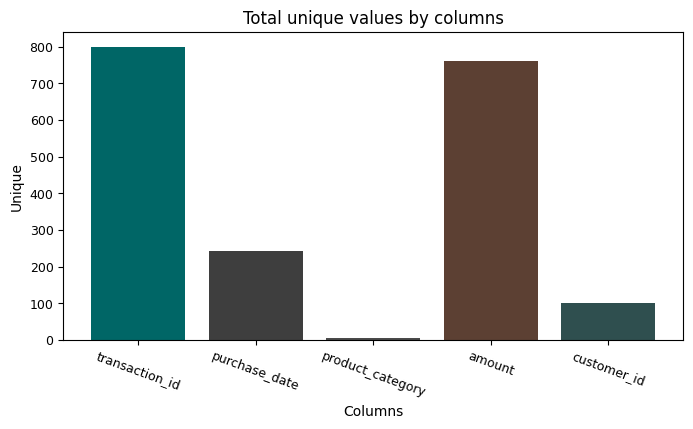

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(dfUniqueValues['Column'], dfUniqueValues['Unique values'], 
    color = ['#006666', '#3E3E3E', '#4B4B4B', '#5C4033', '#2F4F4F']
)
ax.set_xlabel('Columns')
ax.set_ylabel('Unique')
ax.set_title('Total unique values by columns')
plt.xticks(fontsize = 9, rotation = -20)
plt.yticks(fontsize = 9, rotation = 0)
plt.show()

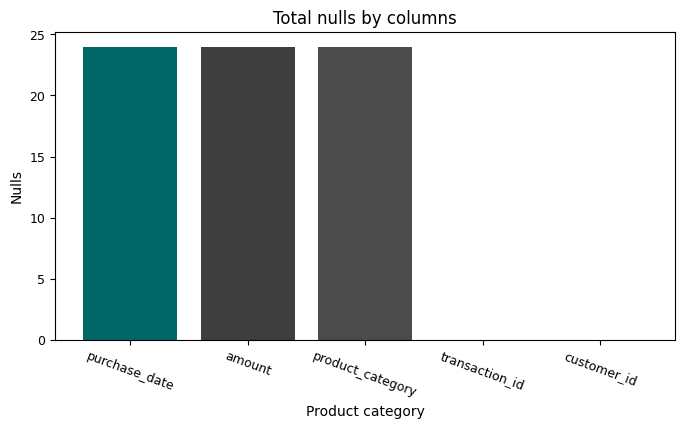

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(dfNulls['Columns'], dfNulls['Nulls'], 
    color = ['#006666', '#3E3E3E', '#4B4B4B', '#5C4033', '#2F4F4F'])
ax.set_xlabel('Product category')
ax.set_ylabel('Nulls')
ax.set_title('Total nulls by columns')
plt.xticks(fontsize = 9, rotation = -20)
plt.yticks(fontsize = 9, rotation = 0)
plt.show()

In [9]:
valuesCustomerID = df['customer_id'].value_counts(dropna = False).reset_index()
valuesCustomerID.columns = ['Customer_id', 'Count']
valuesCustomerID = valuesCustomerID.sort_values(by=['Count'], ascending=False)

valuesPurchaseDate = df['purchase_date'].value_counts(dropna = False).reset_index()
valuesPurchaseDate.columns = ['Purchase_date', 'Count']
valuesPurchaseDate = valuesPurchaseDate.sort_values(by=['Count'], ascending=False)

valuesProductsCategory = df['product_category'].value_counts(dropna = False).reset_index()
valuesProductsCategory.columns = ['Product_category', 'Count']
valuesProductsCategory = valuesProductsCategory.sort_values(by=['Count'], ascending=False)

valuesAmount = df['amount'].value_counts(dropna = False).reset_index()
valuesAmount.columns = ['Amount', 'Count']
valuesAmount = valuesAmount.sort_values(by=['Count'], ascending=False)

valuesTransactionID = df['transaction_id'].value_counts(dropna = False).reset_index()
valuesTransactionID.columns = ['ID', 'Count']
valuesTransactionID = valuesTransactionID.sort_values(by=['Count'], ascending=False)

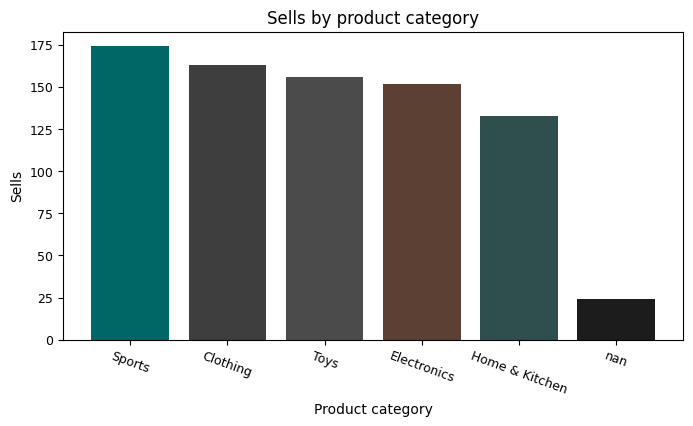

In [10]:
counts = df['product_category'].astype(str).value_counts()

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(
    counts.index, 
    counts.values,
    color = ['#006666','#3E3E3E','#4B4B4B', '#5C4033','#2F4F4F','#1C1C1C']
)

ax.set_xlabel('Product category')
ax.set_ylabel('Sells')
ax.set_title('Sells by product category')
plt.xticks(fontsize=9, rotation=-20)
plt.yticks(fontsize=9)
plt.show()

In [11]:
valuesAmount5 = valuesAmount.iloc[0:5]
valuesProductsCategory5 = valuesProductsCategory.iloc[0:5]
valuesPurchaseDate5 = valuesPurchaseDate.iloc[0:5]
valuesTransactionID5 = valuesTransactionID.iloc[0:5]
valuesCustomerID5 = valuesCustomerID.iloc[0:5]

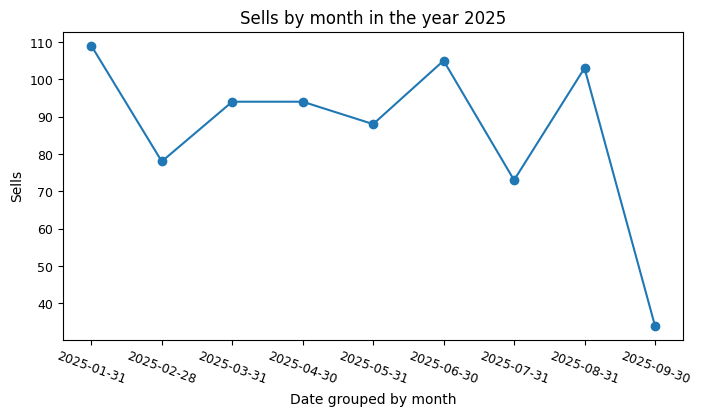

In [12]:
dateGroupedMonth = valuesPurchaseDate.groupby(pd.Grouper(key='Purchase_date', freq='ME')).sum().reset_index()

fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(dateGroupedMonth['Purchase_date'].astype(str), dateGroupedMonth['Count'])
ax.plot(dateGroupedMonth['Purchase_date'].astype(str), dateGroupedMonth['Count'])
ax.set_ylabel('Sells')
ax.set_xlabel('Date grouped by month')
ax.set_title('Sells by month in the year 2025')
plt.xticks(fontsize = 9, rotation = -20)
plt.yticks(fontsize = 9, rotation = 0)
plt.show()

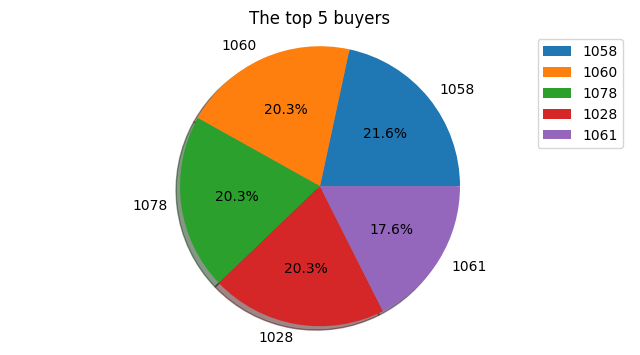

In [13]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.pie(valuesCustomerID5['Count'], labels=valuesCustomerID5['Customer_id'].astype(str), autopct='%1.1f%%', shadow=True)
ax.set_title('The top 5 buyers')
ax.axis('equal')
ax.legend()
plt.show()